# Assignment on Classification

Do the following in the iris dataset
1. Read the dataset to python environment
2. Do the necessary pre-processing steps
3. Find out which classification model gives the best result 

(try all the classification algorithms discussed in the session)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Read the dataset to python Environment

In [2]:

data=pd.read_excel(r"C:\Users\msham\Documents\Data science\Assignment on Classification\iris.xls")
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### 2. Do the necessary pre-processing Steps

In [3]:
#Do the necessary pre-processing Steps
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [7]:
num_cols=data[['SL','SW','PL']]

In [8]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan,strategy='mean')
imputer=imputer.fit(num_cols)
num_cols=imputer.transform(num_cols)
num_cols=pd.DataFrame(num_cols,columns=['SL','SW','PL'])
num_cols.isna().sum()

SL    0
SW    0
PL    0
dtype: int64

In [9]:
data=data.drop(['SL','SW','PL'],axis=1)
data=pd.concat([num_cols,data],axis=1)
data

,SL,SW,PL,PW,Classification
0,5.100000,3.5,1.40000,0.2,Iris-setosa
1,4.900000,3.0,1.40000,0.2,Iris-setosa
2,5.855944,3.2,1.30000,0.2,Iris-setosa
3,4.600000,3.1,1.50000,0.2,Iris-setosa
4,5.000000,3.6,1.40000,0.2,Iris-setosa
...,...,...,...,...,...
145,6.700000,3.0,5.20000,2.3,Iris-virginica
146,6.300000,2.5,5.00000,1.9,Iris-virginica
147,6.500000,3.0,3.75625,2.0,Iris-virginica
148,6.200000,3.4,5.40000,2.3,Iris-virginica


In [10]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [11]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
data['Classification']= label_encoder.fit_transform(data['Classification'])
data['Classification'].unique()


array([0, 1, 2])

In [12]:
data.head()

,SL,SW,PL,PW,Classification
0,5.100000,3.5,1.4,0.2,0
1,4.900000,3.0,1.4,0.2,0
2,5.855944,3.2,1.3,0.2,0
3,4.600000,3.1,1.5,0.2,0
4,5.000000,3.6,1.4,0.2,0


In [13]:
data['Classification'].value_counts()

0    50
1    50
2    50
Name: Classification, dtype: int64

In [14]:
corr_matrix = data.corr()
corr_matrix

,SL,SW,PL,PW,Classification
SL,1.000000,-0.099250,0.831400,0.800726,0.773593
SW,-0.099250,1.000000,-0.413551,-0.340278,-0.405818
PL,0.831400,-0.413551,1.000000,0.936389,0.929629
PW,0.800726,-0.340278,0.936389,1.000000,0.956464
Classification,0.773593,-0.405818,0.929629,0.956464,1.000000


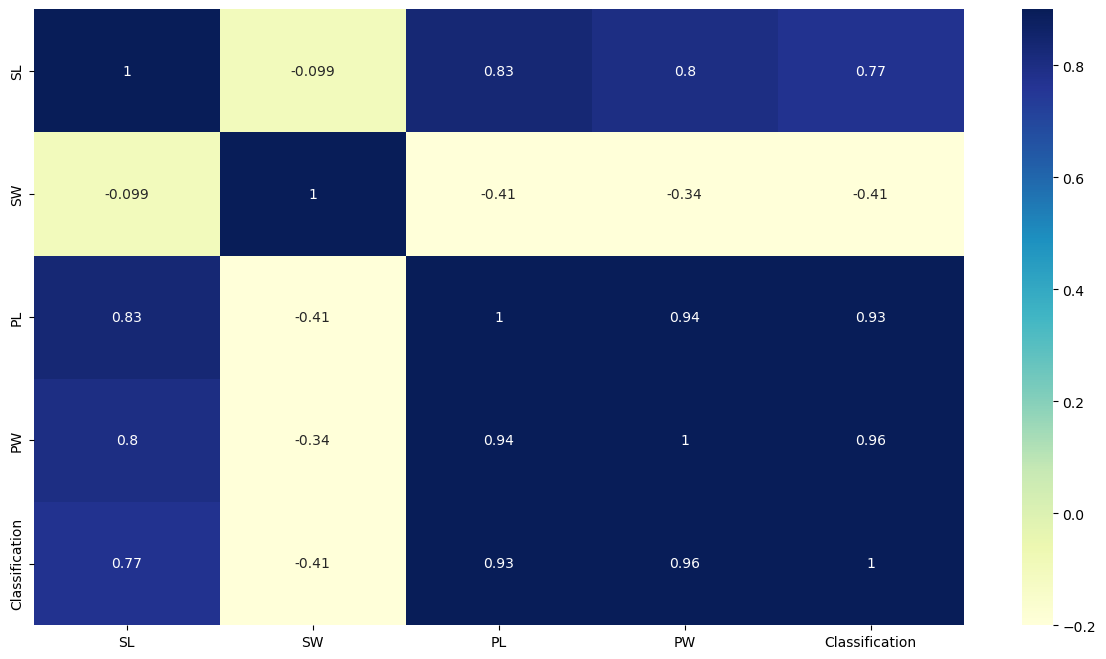

In [15]:
plt.subplots(figsize = (15,8))
sns.heatmap(corr_matrix,vmin=-0.2,vmax=0.9,annot=True,cmap='YlGnBu')
plt.show()

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              150 non-null    float64
 1   SW              150 non-null    float64
 2   PL              150 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


### Find out which classification model gives the best result

In [17]:
x=data.drop('Classification',axis=1)
y=data['Classification']

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state = 42)

## Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression 
log_model = LogisticRegression()
log_model = log_model.fit(x_train,y_train)

C:\Users\msham\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [20]:
y_pred = log_model.predict(x_test)

In [21]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
confusion_matrix(y_test,y_pred)

array([[14,  1,  0],
       [ 0, 11,  0],
       [ 0,  0, 12]], dtype=int64)

In [22]:
accuracy_score(y_test,y_pred)

0.9736842105263158

In [24]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.93      0.97        15
           1       0.92      1.00      0.96        11
           2       1.00      1.00      1.00        12

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



In [25]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

## KNN

In [26]:
from sklearn.neighbors import KNeighborsClassifier
metric_k=[]
neighbors = np.arange(3,15)

In [27]:
for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors=k, metric= 'euclidean')
    classifier.fit(x_train,y_train)
    y_pred_knn = classifier.predict(x_test)
    acc = accuracy_score(y_test,y_pred_knn)
    metric_k.append(acc)

C:\Users\msham\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\msham\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

In [28]:
metric_k

[0.9473684210526315,
 0.9736842105263158,
 0.9473684210526315,
 0.9473684210526315,
 0.9473684210526315,
 0.9736842105263158,
 0.9736842105263158,
 0.9736842105263158,
 0.9736842105263158,
 0.9736842105263158,
 0.9736842105263158,
 0.9736842105263158]

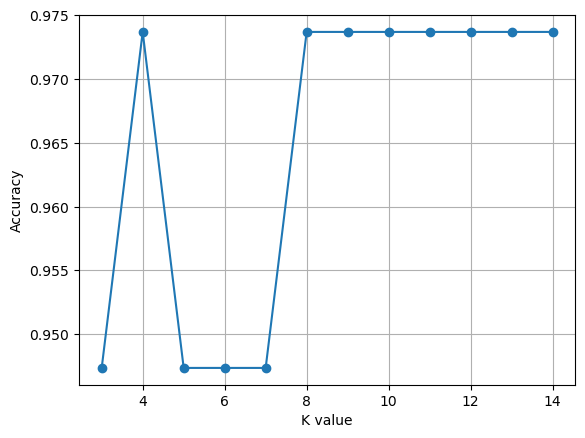

In [29]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel("K value")
plt.ylabel("Accuracy")
plt.grid()

In [30]:
classifier = KNeighborsClassifier(n_neighbors=11, metric= 'euclidean')
classifier.fit(x_train,y_train)
y_pred_knn = classifier.predict(x_test)
acc = accuracy_score(y_test,y_pred_knn)

C:\Users\msham\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [31]:
accuracy_score(y_test,y_pred_knn)

0.9736842105263158

In [32]:
confusion_matrix(y_test,y_pred_knn)

array([[14,  1,  0],
       [ 0, 11,  0],
       [ 0,  0, 12]], dtype=int64)

In [33]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       1.00      0.93      0.97        15
           1       0.92      1.00      0.96        11
           2       1.00      1.00      1.00        12

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



## SVC

In [34]:
from sklearn.svm import SVC
svm_clf = SVC(kernel='rbf')
svm_model=svm_clf.fit(x_train,y_train)
y_pred = svm_clf.predict(x_test)

In [35]:
from sklearn.metrics import confusion_matrix, accuracy_score
confusion_matrix(y_test,y_pred)

array([[14,  1,  0],
       [ 0, 11,  0],
       [ 0,  0, 12]], dtype=int64)

In [36]:
accuracy_score(y_test,y_pred)

0.9736842105263158

In [37]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.93      0.97        15
           1       0.92      1.00      0.96        11
           2       1.00      1.00      1.00        12

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



## Decision Tree

In [38]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(x_train,y_train)
y_predc = dt_clf.predict(x_test)
confusion_matrix(y_test,y_predc)

array([[15,  0,  0],
       [ 0, 11,  0],
       [ 0,  0, 12]], dtype=int64)

In [39]:
accuracy_score(y_test,y_predc)

1.0

In [40]:
print(classification_report(y_test, y_predc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



## Random Forest

In [41]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(x_train,y_train)
y_predct = rf_clf.predict(x_test)
confusion_matrix(y_test,y_predct)

array([[15,  0,  0],
       [ 0, 11,  0],
       [ 0,  0, 12]], dtype=int64)

In [42]:
accuracy_score(y_test,y_predct)

1.0

In [43]:
print(classification_report(y_test, y_predct))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



In [45]:
from sklearn.metrics import accuracy_score, log_loss
classifiers = [
    LogisticRegression(),
    KNeighborsClassifier(),
    SVC(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
                  ]


In [47]:
log_cols=["Classifier", "Accuracy", "Log Loss"]
log = pd.DataFrame(columns=log_cols)
 
for clf in classifiers:
    clf.fit(x_train, y_train)
    name = clf.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results****')
    train_predictions = clf.predict(x_test)
    acc = accuracy_score(y_test, train_predictions)
    print("Accuracy: {:.4%}".format(acc))
    
    log_entry = pd.DataFrame([[name, acc*100, 11]], columns=log_cols)
    log = log.append(log_entry)
    
    print("="*30)

LogisticRegression
****Results****
Accuracy: 97.3684%
KNeighborsClassifier
****Results****
Accuracy: 94.7368%
SVC
****Results****
Accuracy: 97.3684%
DecisionTreeClassifier
****Results****
Accuracy: 100.0000%
RandomForestClassifier
****Results****
Accuracy: 100.0000%


C:\Users\msham\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\msham\AppData\Local\Temp\ipykernel_11972\1339748384.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  log = log.append(log_entry)
C:\Users\msham\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, thi

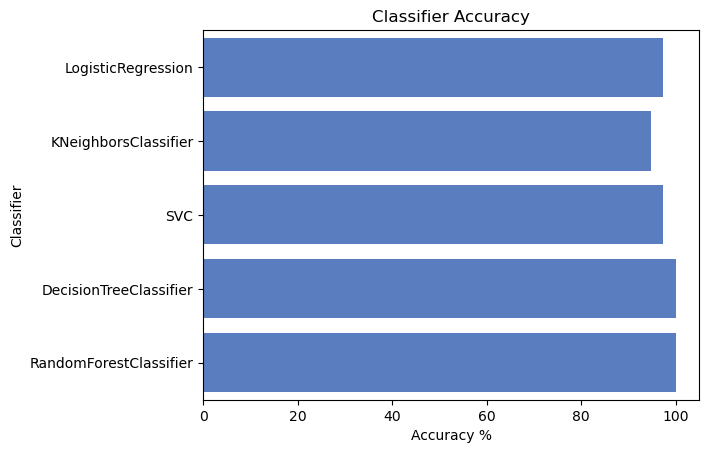

In [48]:
sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")

plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy')
plt.show()